<a href="https://colab.research.google.com/github/Kethellem/cursopython/blob/main/Regress%C3%A3oLinearTeste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [29]:
from google.colab import files
uploaded = files.upload()

Saving ALUGUEL_MOD12.csv to ALUGUEL_MOD12 (1).csv


In [30]:
df = pd.read_csv('ALUGUEL_MOD12.csv', delimiter=';')
df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


In [31]:
#Verificando tipo de dados
df.dtypes

,0
Valor_Aluguel,int64
Valor_Condominio,int64
Metragem,int64
N_Quartos,int64
N_banheiros,int64
N_Suites,int64
N_Vagas,int64


In [32]:
#Verificando dados faltantes
df.isnull().values.any()

np.False_

In [33]:
#Utilizando a função describe para identificar outliers
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


Valores extremos foram identificados nas colunas:
**Valor_Aluguel, Valor_Condominio e Metragem** (valores muito acima da média).Também há registros raros com até 10 quartos, 8 banheiros, 9 vagas.



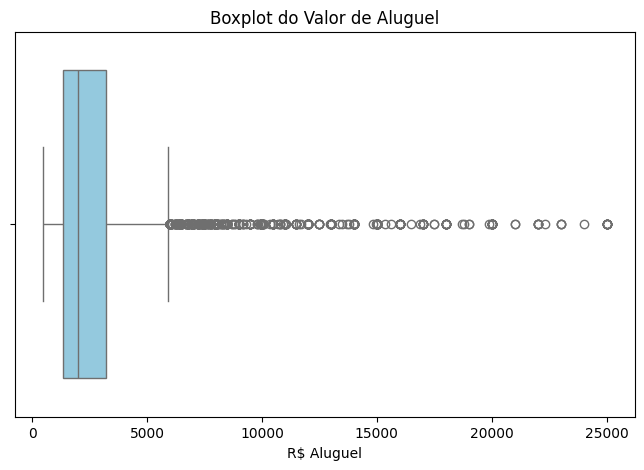

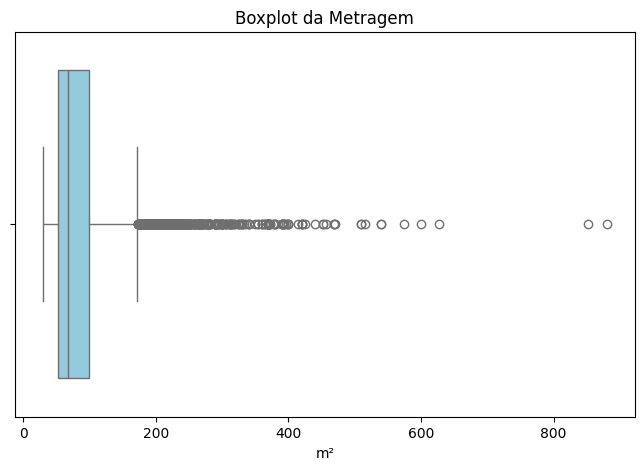

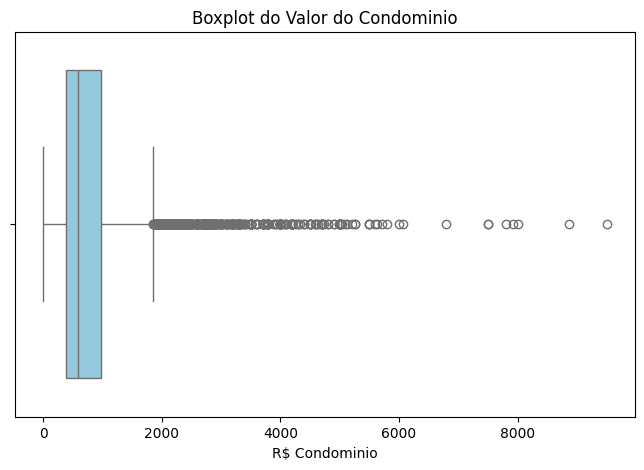

In [34]:
# Plotando gráficos coluna Valor_Aluguel , Metragem e Valor_Condominio para visualizar outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Valor_Aluguel"], color="skyblue")
plt.title("Boxplot do Valor de Aluguel")
plt.xlabel("R$ Aluguel")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Metragem"], color="skyblue")
plt.title("Boxplot da Metragem")
plt.xlabel("m²")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Valor_Condominio"], color="skyblue")
plt.title("Boxplot do Valor do Condominio")
plt.xlabel("R$ Condominio")
plt.show()

Tratamento da coluna Valor_Aluguel — Remover Outliers

In [43]:
# Calcular limites usando IQR
Q1 = df['Valor_Aluguel'].quantile(0.25)
Q3 = df['Valor_Aluguel'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover outliers
df_aluguel_tratado = df[(df['Valor_Aluguel'] >= limite_inferior) & (df['Valor_Aluguel'] <= limite_superior)]


O valor do aluguel varia bastante (ex: de 480 a 25.000). Para evitar que valores extremos distorçam a média e as análises, usamos o método IQR, que é robusto e fácil de interpretar.
Ao remover esses valores extremos, deixamos a base mais estável para análise estatística e predição.


Tratamento da coluna Valor_Condominio — Substituir Outliers pela Mediana

In [46]:
# Calcular limites usando IQR
Q1 = df['Valor_Condominio'].quantile(0.25)
Q3 = df['Valor_Condominio'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Calcular a mediana da coluna
mediana = df['Valor_Condominio'].median()

# Substituir os outliers pela mediana
df_condominio_tratado = df.copy()
df_condominio_tratado['Valor_Condominio'] = df['Valor_Condominio'].apply(
    lambda x: mediana if x < limite_inferior or x > limite_superior else x
)

Como o valor do condomínio pode variar bastante (ex:  0 a 9.500), e em alguns casos pode ser legítimo (condomínios de luxo), optamos por não excluir os dados.A substituição por mediana preserva o registro do imóvel e corrige o impacto do valor extremo na análise a mediana é resistente a valores fora do padrão e não distorce as estatísticas centrais.



Tratamento da coluna Metragem

In [48]:
Q1 = df["Metragem"].quantile(0.25)
Q3 = df["Metragem"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtra os valores considerados outliers
outliers_metragem = df[(df["Metragem"] < limite_inferior) | (df["Metragem"] > limite_superior)]

df["Metragem"] = df["Metragem"].apply(lambda x: min(x, limite_superior))

Evita excluir dados reais (ex: cobertura ou imóvel comercial) e preserva o comportamento geral do dataset, com menos ruído


ANÁLISE BIVARIADA

Valor_Aluguel X Metragem

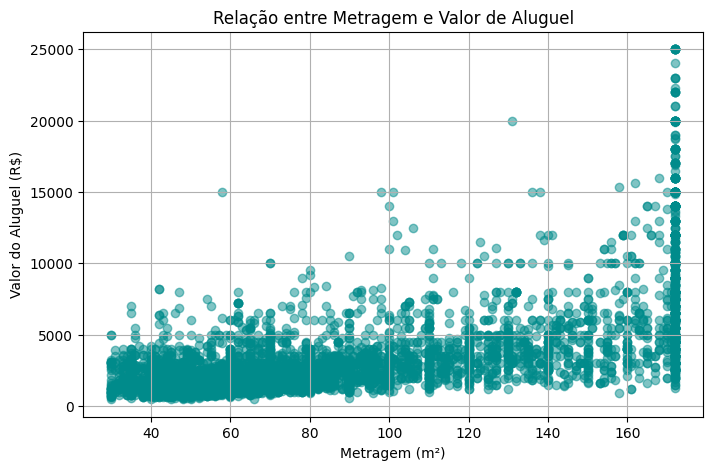

In [49]:
plt.figure(figsize=(8, 5))
plt.scatter(df["Metragem"], df["Valor_Aluguel"], alpha=0.5, c="darkcyan")
plt.title("Relação entre Metragem e Valor de Aluguel")
plt.xlabel("Metragem (m²)")
plt.ylabel("Valor do Aluguel (R$)")
plt.grid(True)
plt.show()

Existe uma tendência positiva: imóveis maiores tendem a ter aluguéis mais altos.


Valor_Condominio X Valor_Aluguel

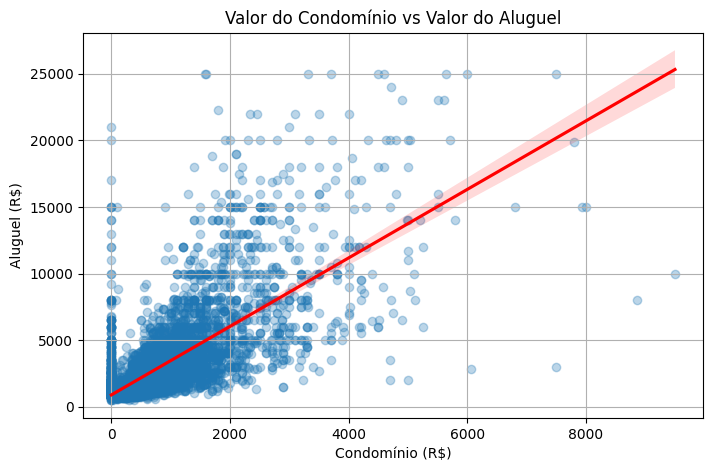

In [50]:
plt.figure(figsize=(8, 5))
sns.regplot(x="Valor_Condominio", y="Valor_Aluguel", data=df, scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
plt.title("Valor do Condomínio vs Valor do Aluguel")
plt.xlabel("Condomínio (R$)")
plt.ylabel("Aluguel (R$)")
plt.grid(True)
plt.show()

Há uma correlação moderada: condomínios mais caros costumam vir acompanhados de aluguéis mais altos.


Quartos X Valor_Alugue

/tmp/ipython-input-51-2098067321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="N_Quartos", y="Valor_Aluguel", data=df, palette="coolwarm")


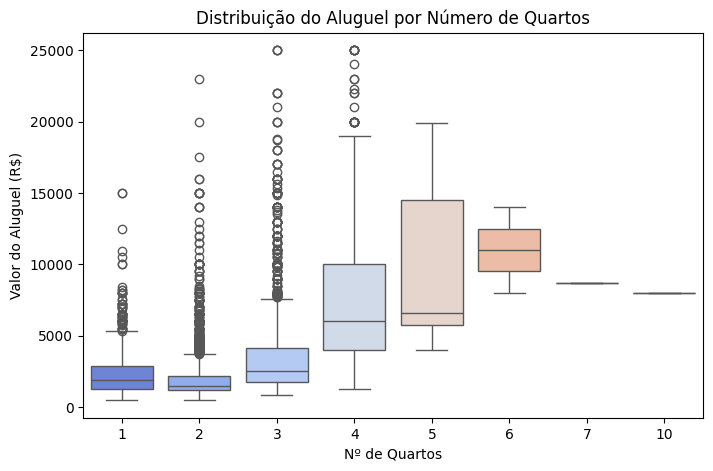

In [51]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="N_Quartos", y="Valor_Aluguel", data=df, palette="coolwarm")
plt.title("Distribuição do Aluguel por Número de Quartos")
plt.xlabel("Nº de Quartos")
plt.ylabel("Valor do Aluguel (R$)")
plt.show()

Quartos podem ser um forte preditor do valor do imóvel talvez até mais que metragem em alguns casos.


In [52]:
#Matriz de correlaçãp
df.select_dtypes(include=['number']).corr()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
Valor_Aluguel,1.000000,0.695302,0.677862,0.413139,0.603715,0.614397,0.652858
Valor_Condominio,0.695302,1.000000,0.725977,0.497420,0.585795,0.589244,0.690993
Metragem,0.677862,0.725977,1.000000,0.730871,0.702112,0.683377,0.727548
N_Quartos,0.413139,0.497420,0.730871,1.000000,0.553807,0.540887,0.591224
N_banheiros,0.603715,0.585795,0.702112,0.553807,1.000000,0.920149,0.694983
N_Suites,0.614397,0.589244,0.683377,0.540887,0.920149,1.000000,0.712054
N_Vagas,0.652858,0.690993,0.727548,0.591224,0.694983,0.712054,1.000000


Text(0.5, 1.0, 'Matriz de Correlação')

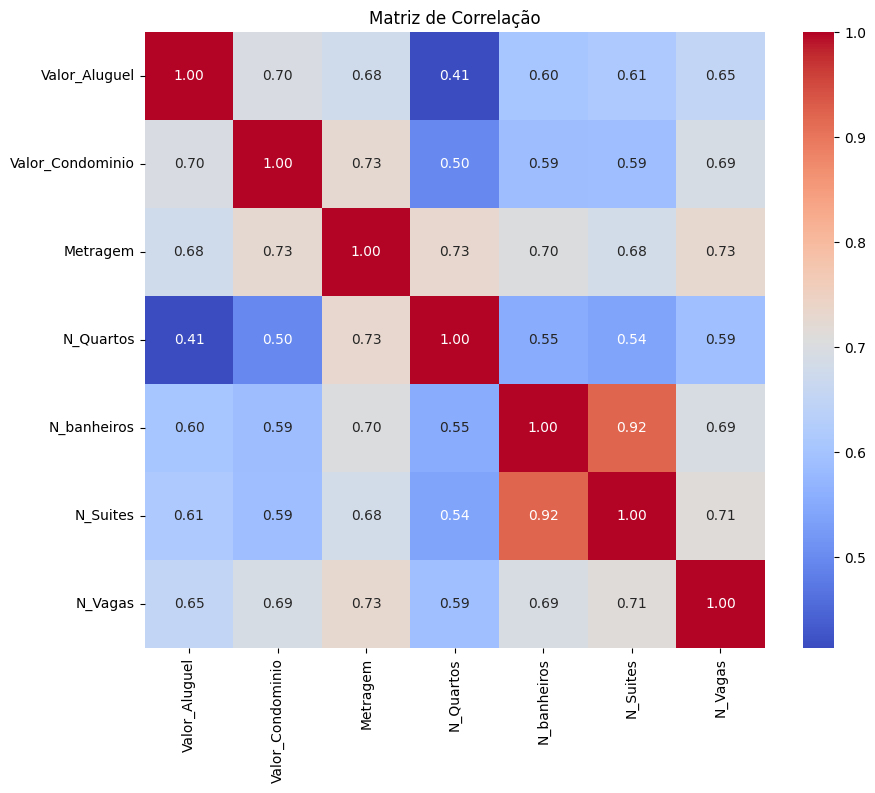

In [53]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Matriz de Correlação')

Correlção mais relevantes com Valor_Aluguel:
**Valor_Condominio**: Forte associação: imóveis mais caros tendem a ter condomínio alto
**Metragem**: Imóveis maiores geralmente temm aluguel mais caro
**N_Vagas**:Ter mais vagas contribui significativamente para o valor do aluguel
**N_Suites**: Imóveis com mais suítes costumam ter padrão elevado
**N_Banheiros**: Pode indicar conforto e funcionalidade do imóvel

In [54]:
#Separar os dados em features(x) e o alvo (y)
X = df.drop('Valor_Aluguel', axis=1)
y = df['Valor_Aluguel']

In [56]:
#Separar os dados em conjuntos de trieno e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (5762, 6)
Tamanho de y_train: (5762,)
Tamanho de X_test: (1441, 6)
Tamanho de y_test: (1441,)


In [60]:
X = X_train[['Valor_Condominio']]
y = y_train

In [61]:
X

,Valor_Condominio
5985,1500
6697,2291
2208,0
1423,275
122,200
...,...
3772,450
5191,570
5226,976
5390,550


In [62]:
# Regressao_valor será usao para representar nosso modelo de regressão linear
regressao_valor = LinearRegression()
regressao_valor.fit(X, y)
# Após a execução desta linha, o modelo estará pronto para fazer a previsão

LinearRegression()

In [64]:
# Plotando intercet
regressao_valor.intercept_

np.float64(928.4174667742909)

In [65]:
# Plotando coef_
regressao_valor.coef_

array([2.47357279])

- Intercept (928.47) → representa o valor base estimado do aluguel quando o condomínio é 0 (mesmo que improvável, é o ponto de partida da linha).
- Coef (2.475) → significa que a cada  1,00 a mais de condomínio, o aluguel aumenta em  2,48 (de forma linear, segundo esse modelo).


In [66]:
# Calculando R2
regressao_valor.score(X,y)

0.469569444672682

O modelo atual, treinado com apenas a variável Valor_Condominio como preditora, explica cerca de 47% da variação no Valor do Aluguel dos imóveis da base de dados.Isso revela que o valor do condomínio possui influência real sobre o aluguel — ou seja, há uma relação estatística significativa, e a tendência captada pelo modelo faz sentido economicamente.



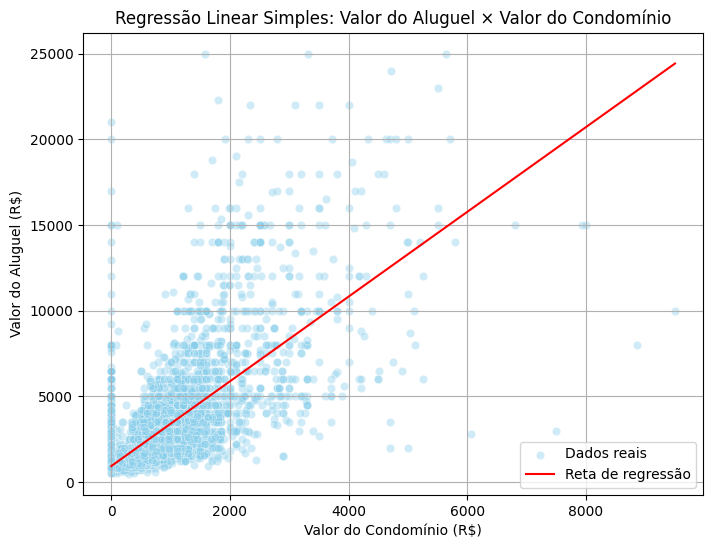

In [71]:
# Plotando Gráfico da Reta de Regressão

plt.figure(figsize=(8, 6))

# Dados reais (X e Y do treino)
sns.scatterplot(x=X_train["Valor_Condominio"], y=y_train, alpha=0.4, color="skyblue", label="Dados reais")

# Reta da regressão predita pelo modelo
sns.lineplot(x=X_train["Valor_Condominio"], y=regressao_valor.predict(X_train[["Valor_Condominio"]]),
             color="red", label="Reta de regressão")

# Títulos e eixos
plt.title("Regressão Linear Simples: Valor do Aluguel × Valor do Condomínio")
plt.xlabel("Valor do Condomínio (R$)")
plt.ylabel("Valor do Aluguel (R$)")
plt.legend()
plt.grid(True)
plt.show()

Os pontos azuis estão espalhados ao redor da reta vermelha isso indica que há uma tendência geral, mas os dados não se ajustam perfeitamente — há variabilidade natural do mercado.
Exemplos: dois imóveis com condomínio parecido podem ter aluguéis diferentes por causa de metragem, localização, padrão etc.


In [72]:
# Modelo a base de teste
X_teste = X_test[["Valor_Condominio"]]
y_teste = y_test

In [76]:
previsoes = regressao_valor.predict(X)
previsoes

array([4638.77664585, 6595.37271962,  928.41746677, ..., 3342.62450596,
       2288.8824991 , 1373.66056826])

In [79]:
y

,Valor_Aluguel
5985,4200
6697,7450
2208,1500
1423,1250
122,800
...,...
3772,2000
5191,3000
5226,3000
5390,3200


R² se mantem próximo nos conjuntos de treino e teste mostra que o modelo tem boa capacidade de generalização — ele não está superajustado e consegue repetir seu desempenho em dados que nunca viu com uma única variável (Valor_Condominio), capturar quase metade da variação no preço dos aluguéis já é significativo. Esse resultado indica que o valor do condomínio é uma variável relevante no comportamento de preços, provavelmente associada ao padrão e localização do imóvel.
O modelo simples mostra potencial — ele capta uma tendência legítima entre condomínio e aluguel. Mas para alcançar previsões mais precisas e robustas, é necessário enriquecer o modelo com múltiplas variáveis que também influenciam o valor do imóvel.



REGRESSÃO LINEAR MULTIPLA

In [84]:
X = df[[
    "Valor_Condominio",
    "Metragem",
    "N_Quartos",
    "N_banheiros",
    "N_Suites",
    "N_Vagas"
]]

y = df["Valor_Aluguel"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (5762, 6)
y_train: (5762,)
X_test: (1441, 6)
y_test: (1441,)


In [85]:
regressao_multipla = LinearRegression()
regressao_multipla.fit(X, y)

LinearRegression()

In [86]:
# Intercept (valor base do aluguel sem nenhuma influência das variáveis)
regressao_multipla.intercept_

np.float64(79.38763541254548)

In [87]:
# Coef de cada variável
regressao_multipla.coef_

array([   1.1949906 ,   24.01644051, -682.66320052,   68.10469015,
        518.33726775,  585.5177522 ])

In [88]:
# Calculando R2
regressao_multipla.score(X,y)

0.5945530731341186

In [93]:
X_teste = X_test[[
    "Valor_Condominio",
    "Metragem",
    "N_Quartos",
    "N_banheiros",
    "N_Suites",
    "N_Vagas"
]]
y_teste = y_test

In [95]:
X

,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,295,48.0,2,2,1,1
1,0,50.0,1,2,1,1
2,0,40.0,1,2,1,1
3,36,45.0,1,2,1,0
4,0,30.0,1,1,0,0
...,...,...,...,...,...,...
7198,7500,172.0,4,5,4,6
7199,4600,172.0,4,2,1,0
7200,3700,172.0,3,4,3,7
7201,6000,172.0,4,5,4,8


In [98]:
# Modelo simples: só Valor_Condomínio
y_pred_simples = regressao_valor.predict(X_test[["Valor_Condominio"]])
r2_simples = r2_score(y_test, y_pred_simples)

# Modelo múltiplo: todas as variáveis
y_pred_multipla = regressao_multipla.predict(X_test)
r2_multipla = r2_score(y_test, y_pred_multipla)

print(f"R² Regressão Simples:  {r2_simples:.4f}")
print(f"R² Regressão Múltipla: {r2_multipla:.4f}")

R² Regressão Simples:  0.5210
R² Regressão Múltipla: 0.6157


A **regressão simples** é um bom ponto de partida, mas limitada: ela considera apenas o valor do condomínio como fator de precificação.

A **regressão múltipla** enriquece a análise, incorporando fatores estruturais do imóvel (como metragem, quantidade de suítes, vagas), tornando as previsões mais fiéis à realidade do mercado.